Referências

[[1] PCA Medium, Scikit-learn, Principal Component Analysis (PCA) with Scikit-learn](https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0)

### Step 1: Import libraries and set plot styles

In [144]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
plt.style.use('ggplot')

### Step 2: Get and prepare data

In [145]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [146]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [148]:
df.shape

(569, 30)

### Step 3: Apply PC

#### 3.1. Matriz de características

In [149]:
X = df.values
X.shape

(569, 30)

#### 3.2. Padronizando as características caso necessário

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Cálculo da média e do desvio padrão
scaler.fit(X)

# Tranformação dos valores
X_scaled = scaler.transform(X)

In [151]:
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

#### 3.3. Escolhas das dimensões mais relevantes

In [152]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [153]:
len(df.columns)

30

##### __Parâmetros PCA__

In Scikit-learn, PCA is applied using the PCA() class. It is in the decomposition submodule in Scikit-learn. The most important hyperparameter in that class is __n_components__. It can take one of the following types of values.

None: This is the default value. If we do not specify the value, all components are kept. In our example, this exactly the same as n_components=30.

int: If this is a positive integer like 1, 2, 30, 100, etc, the algorithm will return that number of principal components. The integer value should be less than or equal to the original number of features in the dataset.

float: If 0 < n_components < 1, PCA will select the number of components such that the amount of variance that needs to be explained. For example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.

In [154]:
from sklearn.decomposition import PCA
NUM_COMPONENTES = 30
pca_30 = PCA(
                n_components=NUM_COMPONENTES, # Se não for especificado o PCA manterá todas as características, o mesmo que escolhendo o valor 30 no nosso caso
                random_state=42
)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [155]:
print(f"A variância explicada por todos os {NUM_COMPONENTES} principais componentes =", sum(pca_30.explained_variance_ratio_*100))

A variância explicada por todos os 30 principais componentes = 100.0


#### 3.4. Relação entre as components PCA e as fetures 

In [156]:
list_feature_names = ["PCA_" + str(i + 1) for i in range(len(pca_30.components_))]

In [157]:
df_pca = pd.DataFrame(pca_30.components_,columns=df.columns,index = list_feature_names)
df_pca["PCA_sum"] = df_pca.sum(axis=1)
df_pca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PCA_sum
PCA_1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784,5.045787
PCA_2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339,1.290062
PCA_3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791,0.808340
PCA_4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053,-0.820254
PCA_5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423,-0.850165


In [158]:
df_pca.shape

(30, 31)

Text(0.5, 1.0, 'Dados tranformados em componentes PCA para 100% de variabilidade')

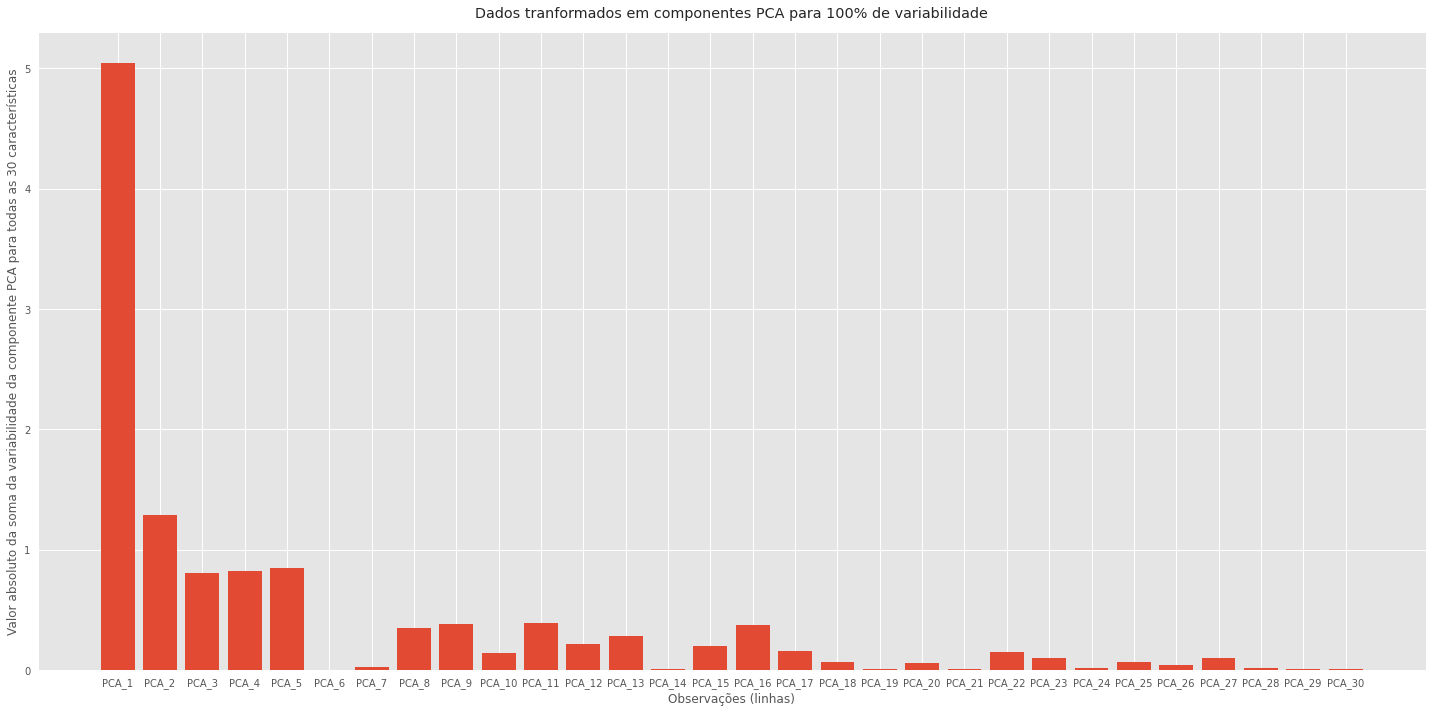

In [159]:
# plt.close()
FIGSIZE = 20
plt.figure(figsize = (FIGSIZE,FIGSIZE/2))
plt.bar(df_pca.index, abs(df_pca["PCA_sum"]))
plt.xlabel("Observações (linhas)")
plt.ylabel("Valor absoluto da soma da variabilidade da componente PCA para todas as 30 características")
plt.title("Dados tranformados em componentes PCA para 100% de variabilidade", pad = 15)

In [160]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

#### Uma lista otimizada de componentes PCA pode ser criada através de um valor limite (THRESHOLD) do valor absoluto da soma pca (SOMAPCA)

In [161]:
lista_otimizada_de_components_PCA = []
soma_var_PCA = 0
THRESHOLD = 0.5
SOMAPCA = abs(df_pca["PCA_sum"])
for i, soma_PCA in enumerate(SOMAPCA):
    variancia_explicada = pca_30.explained_variance_ratio_*100
    if soma_PCA > THRESHOLD: 
        lista_otimizada_de_components_PCA.append(df_pca.index[i])
        soma_var_PCA += variancia_explicada[i]
        # print(df_pca.index[i], soma_PCA, variancia_explicada[i], soma_var_PCA)


print(f"As {len(lista_otimizada_de_components_PCA)} componentes {lista_otimizada_de_components_PCA} explicam {round(soma_var_PCA, 2)}% da variabilidade dos dados.")

As 5 componentes ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'] explicam 84.73% da variabilidade dos dados.


In [162]:
     variancia_explicada = pca_30.explained_variance_ratio_*100
     variancia_explicada[0]

44.272025607526324

The __explained_variance_ratio___ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

In [163]:
pca_30

PCA(n_components=30, random_state=42)

If we get the __cumulative sum__ of the above array, we can see the following array.

In [164]:
np.round(np.cumsum(pca_30.explained_variance_ratio_*100), 2)

array([ 44.27,  63.24,  72.64,  79.24,  84.73,  88.76,  91.01,  92.6 ,
        93.99,  95.16,  96.14,  97.01,  97.81,  98.34,  98.65,  98.92,
        99.11,  99.29,  99.45,  99.56,  99.66,  99.75,  99.83,  99.89,
        99.94,  99.97,  99.99, 100.  , 100.  , 100.  ])

__PLotando__ a soma cumulativa

In [165]:
from matplotlib.pyplot import figure

figure(figsize=(30, 12), dpi=100)

<Figure size 3000x1200 with 0 Axes>

<Figure size 3000x1200 with 0 Axes>

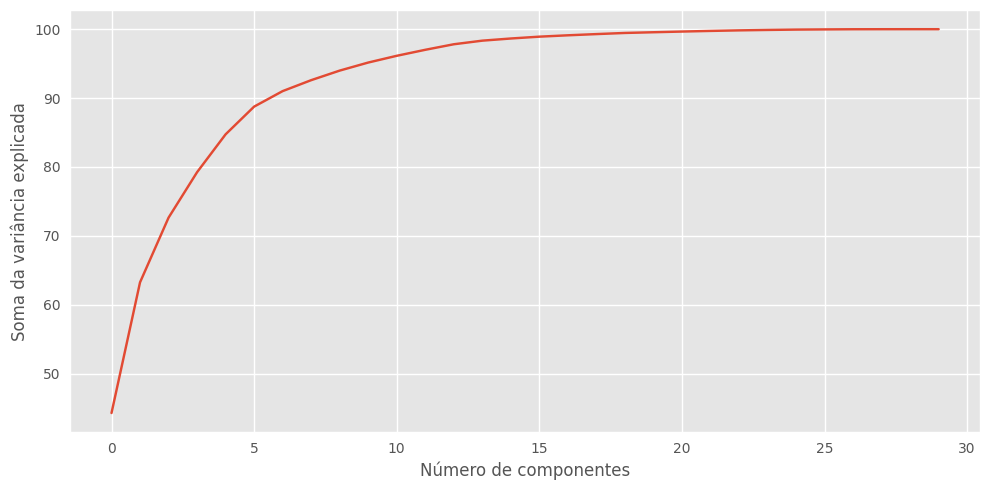

In [166]:
LARGURA_DA_IMAGEM = 10
plt.figure(figsize=(LARGURA_DA_IMAGEM,LARGURA_DA_IMAGEM/2), dpi=100)
plt.plot(np.cumsum(pca_30.explained_variance_ratio_*100))
plt.xlabel("Número de componentes")
plt.ylabel("Soma da variância explicada")
# Salvando
plt.savefig("Elbow_plot.png")

In [167]:
variancia_explicada = pca_30.explained_variance_ratio_*100
for i, soma_da_variancia in enumerate(np.round(np.cumsum(variancia_explicada), 2)):
    print(f"A variância do componente [{i + 1}] é {variancia_explicada[i]}.\nA variância explicada pelos primeiros {i+1} componente(s) somados: ", "\t", soma_da_variancia)

A variância do componente [1] é 44.272025607526324.
A variância explicada pelos primeiros 1 componente(s) somados:  	 44.27
A variância do componente [2] é 18.9711820440331.
A variância explicada pelos primeiros 2 componente(s) somados:  	 63.24
A variância do componente [3] é 9.393163257431377.
A variância explicada pelos primeiros 3 componente(s) somados:  	 72.64
A variância do componente [4] é 6.602134915470156.
A variância explicada pelos primeiros 4 componente(s) somados:  	 79.24
A variância do componente [5] é 5.495768492346268.
A variância explicada pelos primeiros 5 componente(s) somados:  	 84.73
A variância do componente [6] é 4.024522039883341.
A variância explicada pelos primeiros 6 componente(s) somados:  	 88.76
A variância do componente [7] é 2.2507337129825107.
A variância explicada pelos primeiros 7 componente(s) somados:  	 91.01
A variância do componente [8] é 1.5887238000213282.
A variância explicada pelos primeiros 8 componente(s) somados:  	 92.6
A variância do 

A variância do componente [12] é 0.870537900737884.

A variância explicada pelos primeiros 12 componente(s) somados:  	 97.01 %

Apenas 2,99 % da variância é explicada pela outras 18 componentes do PCA. Portando, vamos descartá-las da análise.

In [168]:
COMPONENTES_SOMADAS = 12
print(f"A variância do componente [{COMPONENTES_SOMADAS}] é {variancia_explicada[COMPONENTES_SOMADAS-1]}.\nA variância explicada pelos primeiros {COMPONENTES_SOMADAS} componente(s) somados: ", "\t", np.round(np.cumsum(variancia_explicada)[COMPONENTES_SOMADAS-1], 2))

A variância do componente [12] é 0.870537900737884.
A variância explicada pelos primeiros 12 componente(s) somados:  	 97.01


#### 4. Gráfico 2D com 2 componentes do PCA

In [169]:
COMPONENTES_SOMADAS = 2
print(f"A variância do componente [{COMPONENTES_SOMADAS}] é {variancia_explicada[COMPONENTES_SOMADAS-1]}.\nA variância explicada pelos primeiros {COMPONENTES_SOMADAS} componente(s) somados: ", "\t", np.round(np.cumsum(variancia_explicada)[COMPONENTES_SOMADAS-1], 2))

A variância do componente [2] é 18.9711820440331.
A variância explicada pelos primeiros 2 componente(s) somados:  	 63.24


In [170]:
pca_2 = PCA(n_components=2, random_state=42)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

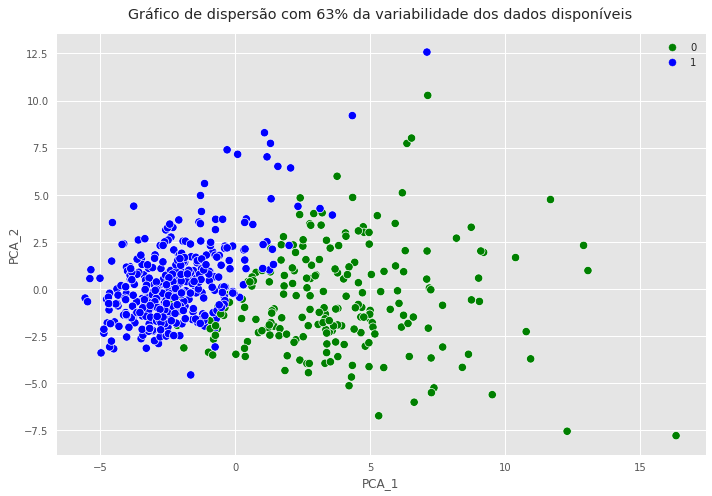

In [171]:
plt.figure(figsize=(10,7))
sns.scatterplot( x = X_pca_2[:,0],
                 y = X_pca_2[:,1], 
                 s=70,
                 hue = cancer.target,
                 palette = ["green", "blue"])
plt.title("Gráfico de dispersão com 63% da variabilidade dos dados disponíveis", pad = 15)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.savefig("grafico_de_dispersao_2D_PCA.png")

Podemos criar um gráfico mais informativo

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

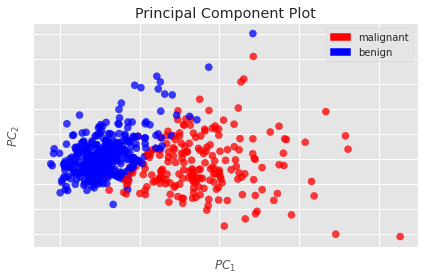

In [172]:
from yellowbrick.features import PCA

grafico_2 = PCA(scale=True,
                projection=2,
                classes = ["malignant", "benign"],
                random_state=42,
                colors=["red", "blue"])
grafico_2.fit_transform(X, cancer.target)
grafico_2.show(outpath="grafico_2D_PCA_yellowbrick.png")

#### 5. Gráfico 3D com 3 componentes do PCA

In [173]:
from sklearn.decomposition import PCA

In [174]:
COMPONENTES_SOMADAS = 3
print(f"A variância do componente [{COMPONENTES_SOMADAS}] é {variancia_explicada[COMPONENTES_SOMADAS-1]}.\nA variância explicada pelos primeiros {COMPONENTES_SOMADAS} componente(s) somados: ", "\t", np.round(np.cumsum(variancia_explicada)[COMPONENTES_SOMADAS-1], 2))

A variância do componente [3] é 9.393163257431377.
A variância explicada pelos primeiros 3 componente(s) somados:  	 72.64


In [175]:
pca_3 = PCA(n_components=3, random_state=42)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

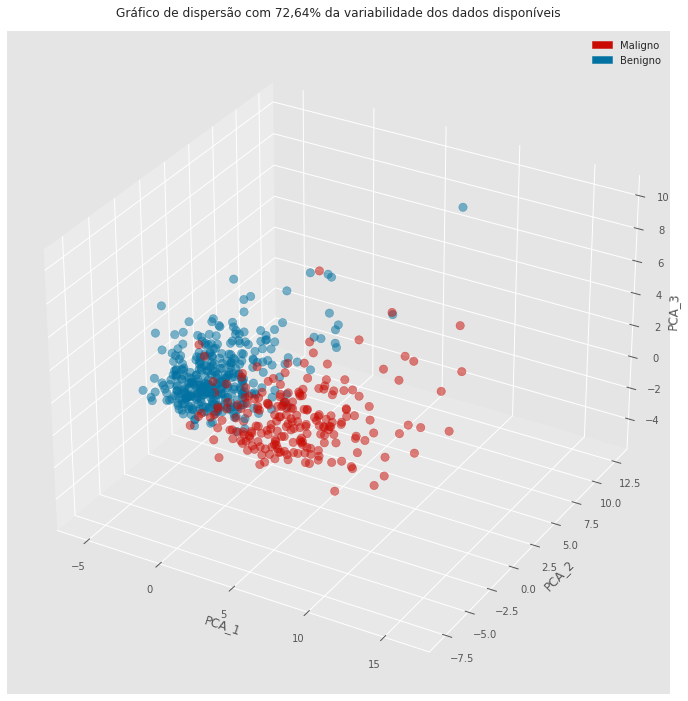

<Figure size 432x288 with 0 Axes>

In [176]:
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

FIGSIZE = 14
fig = plt.figure(figsize=(FIGSIZE, FIGSIZE*0.7))
ax = plt.axes(projection = '3d')

# Texto
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 0.6*FIGSIZE}
plt.rc('font', **font)

# categorias
categorias = cancer.target

# mapa_de_cores
mapa_de_cores = np.array(['r', 'b'])

ax.scatter3D(X_pca_3[:, 0], # PCA_1,
                    X_pca_3[:, 1], # PCA_2
                    X_pca_3[:, 2], # PCA_3
                    c = mapa_de_cores[categorias],
                    s = 70,
                    alpha = 0.5
                    )



plt.title("Gráfico de dispersão com 72,64% da variabilidade dos dados disponíveis", pad = 15)
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")

# Adicionando legendas indiretamente
red_patch = mpatches.Patch(color='r', label='Maligno')
blue_patch = mpatches.Patch(color='b', label='Benigno')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

plt.savefig("grafico_de_dispersao_3D_PCA.png")

````
sns.color_palette()

pported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
````

C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_4848\1906679908.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


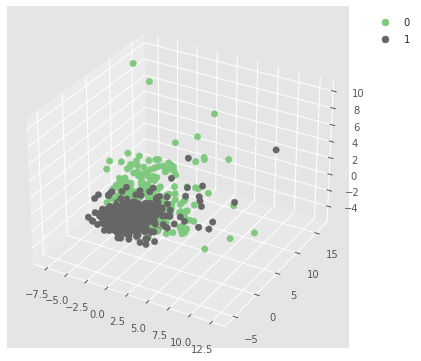

In [177]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
FIGSIZE = 10
plt.rcParams["figure.figsize"] = [FIGSIZE, FIGSIZE/2]
plt.rcParams["figure.autolayout"] = True



y = X_pca_3[:, 0], # PCA_1
x = X_pca_3[:, 1], # PCA_2
z = X_pca_3[:, 2], # PCA_3

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("Accent", 256).as_hex())


sc = ax.scatter(x, y, z, s=40, 
c = cancer.target,
marker='o', cmap=cmap, alpha=1)

# Adicionando legendas diretamente, a partir do DataFrame
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2, )
plt.show()